In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2          # Some of the things in other library took to long
%matplotlib notebook

<IPython.core.display.Javascript object>


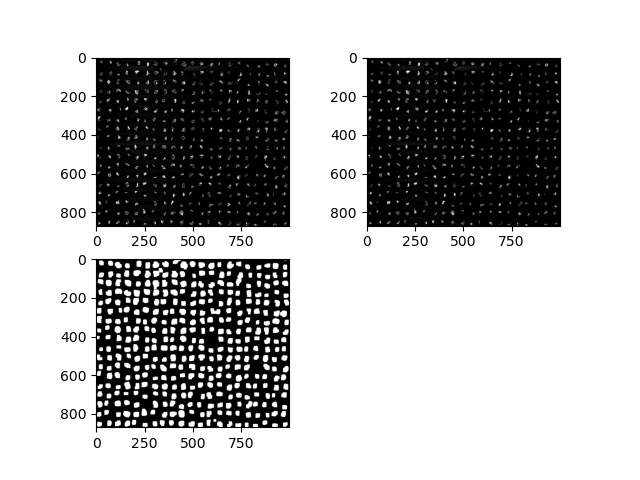

In [75]:
Number = 2
# Start loading in the 3 image types, 
# The first type is a Circle cluster image
# The second type is a Line/Rod cluster image
# The third type is a triangle cluster image
if Number == 1:
    img = cv2.imread('001_002.tif', cv2.IMREAD_GRAYSCALE)
elif Number == 2:
    img = cv2.imread('R001_001.tif', cv2.IMREAD_GRAYSCALE)
elif Number == 3:
    img = cv2.imread('T001.png', cv2.IMREAD_GRAYSCALE)

# Then we cut the gunk that is not needed from the image, this would be un-needed data
# or things that should not be in the image like half-clusters and other things that would
# screw with the data. 

if Number == 1:                 # these values are found by experimenting
    img = img[0:870,:]
    img_org = img
elif Number == 2: 
    img = img[0:870,0:1000]
    #img = img[52:243,382:663]
    img_org = img
elif Number == 3:
    
    img[755:844,672:845] = 0
    img_org = img
    print("No Changes needed for this image type right now") 

#img.astype(np.uint8)

img = cv2.medianBlur(img, 5, 1)
#pedestrian_filter(img, Mex5)
#filter_image(img, Mex5)

# Morpholocial filtering? erroding -> growing, lecture 05 
# The function cv::morphologyEx can perform advanced morphological 
# transformations using an erosion and dilation as basic operations.
ret,thresh = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
#ret,thresh1 = cv2.threshold(img, 10, 200 ,cv2.THRESH_BINARY)

#img = cv2.medianBlur(img, 5)
#kernel = np.ones((8,8), np.uint8)
#img = cv2.dilate(img, kernel, iterations=1)
#img = cv2.erode(img, kernel, iterations=1)
kernel = np.ones((7,7), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=2)


(numLabels, labels, stats, centroids) = cv2.connectedComponentsWithStats(thresh)

#img = unsharp_mask(img)


plt.subplot(2,2,1)
plt.imshow(img_org,'gray',vmin=0,vmax=255)
plt.subplot(2,2,2)
plt.imshow(img,'gray',vmin=0,vmax=255)
plt.subplot(2,2,3)
plt.imshow(thresh,'gray',vmin=0,vmax=255)

<IPython.core.display.Javascript object>


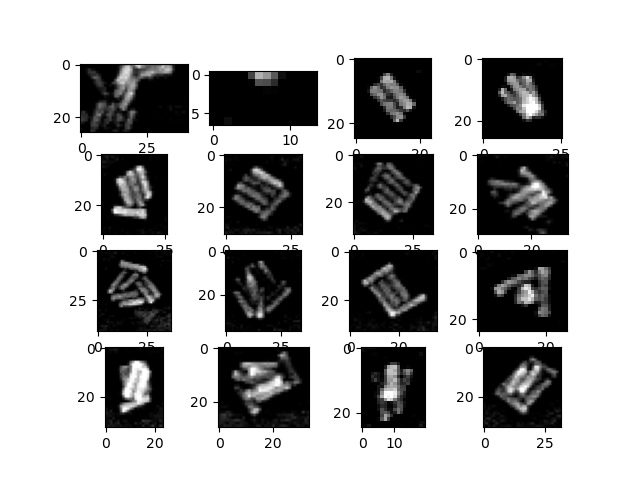

In [76]:
for i in range(16):
    plt.subplot(4,4,i+1)
    x1 = stats[i+1][0]
    y1 = stats[i+1][1]
    x2 = x1+stats[i+1][2]
    y2 = y1+stats[i+1][3]
    plt.imshow(img_org[y1:y2,x1:x2],'gray',vmin=0,vmax=255)